Lane Detection \
Bottom Line

In [23]:
import cv2
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import math


Import video

In [24]:
# Define the relative path to the video file
notebook_dir = Path().resolve()
project_root = notebook_dir.parent.parent
video_path = project_root / "data" / "recording_3" / "Recording_3_normal_speed.mp4"
video_path = str(video_path)

# Load the video
cap = cv2.VideoCapture(video_path)

# Check
print(f"Opened: {cap.isOpened()}, FPS: {cap.get(cv2.CAP_PROP_FPS)}, Total Frames: {cap.get(cv2.CAP_PROP_FRAME_COUNT)}")

Opened: True, FPS: 59.94005994005994, Total Frames: 227.0


Get frame

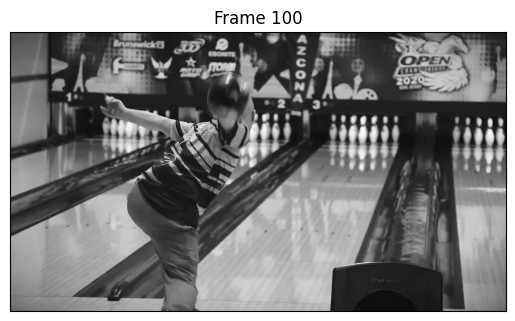

In [25]:
# Set frame position
cap.set(cv2.CAP_PROP_POS_FRAMES, 10)
ret, image_color = cap.read()
if not ret:
    print("Failed to read the frame")
    cap.release()
    exit()

# grayscale
image = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Show the image
plt.imshow(image, cmap='gray')
plt.title('Frame 100')
plt.xticks([]), plt.yticks([])
plt.show()

Cut only the bottom part to detect the starting line

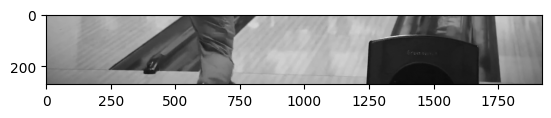

In [26]:
limit_y = math.floor(3/4*image.shape[0])
bottom_image = image[limit_y:image.shape[0], 0:image.shape[1]]
plt.imshow(bottom_image, cmap='gray')


OTSU THRESHOLD FOR EDGE DETECTION \
good automatic way to find the threshold

Text(0.5, 1.0, 'Canny Edges')

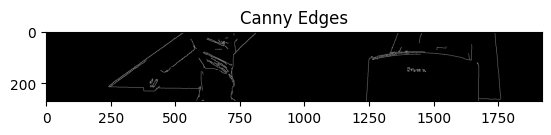

In [27]:
# Compute Otsu's threshold 
otsu_thresh, _ = cv2.threshold(bottom_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Set lower and upper thresholds relative to Otsu's threshold
lower = 0.5 * otsu_thresh
upper = 1.5 * otsu_thresh

edges = cv2.Canny(bottom_image, lower, upper)

plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

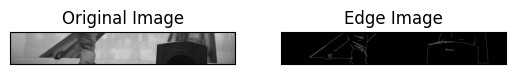

In [28]:
# Display the original image and the edge-detected image
plt.subplot(121), plt.imshow(bottom_image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Line Detection

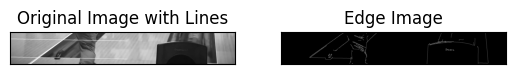

In [29]:
# Use Hough Line Transform to detect lines in the edge-detected image
lines = cv2.HoughLines(edges, 1, np.pi / 180, 125)
lines_image_bottom = bottom_image.copy()
# Draw the lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(lines_image_bottom, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the original image with detected lines
plt.subplot(121), plt.imshow(lines_image_bottom, cmap='gray')
plt.title('Original Image with Lines'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

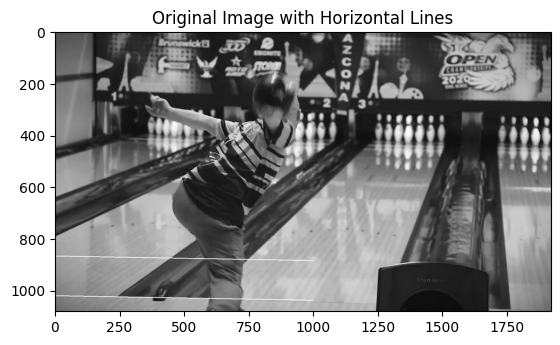

The size of horizontal_lines is: 2


In [30]:
# Tolleranza in radianti (5 gradi)
tolerance = np.deg2rad(5)
if lines is not None:
    # Filtra le linee orizzontali
    horizontal_lines = [line for line in lines if abs(line[0][1] - np.pi/2) <= tolerance]
    
    # potrebbe essere un opzione considerare solo le linee quasi orizzontali, ma con una inclinaizone opposta rispetto alle linee del campo
    # horizontal_lines = [line for line in lines if line[0][1] - np.pi/2 <= tolerance and line[0][1] - np.pi/2 >= 0] # inclinaizone \

    # Crea una copia dell'immagine originale per disegnare le linee
    original_with_lines = image.copy()


    # Disegna le linee orizzontali sull'immagine originale
    if horizontal_lines is not None:
        for line in horizontal_lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(original_with_lines, (x1, y1 + limit_y), (x2, y2 + limit_y), (255, 0, 0), 2)
    else:
        print('Error')

    # Visualizza l'immagine originale con le linee orizzontali
    plt.imshow(original_with_lines, cmap='gray')
    plt.title('Original Image with Horizontal Lines')
    plt.show()
    print(f'The size of horizontal_lines is: {len(horizontal_lines)}')
else:
    print('No lines detected')



Text(0.5, 1.0, 'Canny Edges')

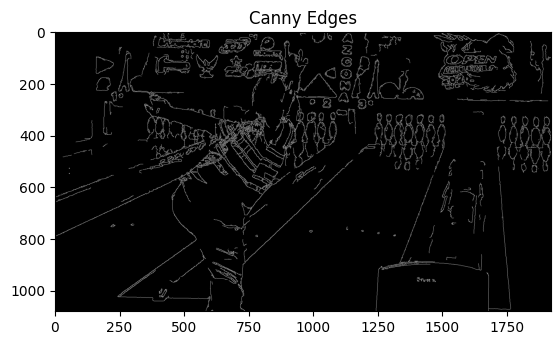

In [31]:
# Compute Otsu's threshold 
otsu_thresh, _ = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Set lower and upper thresholds relative to Otsu's threshold
lower = 0.5 * otsu_thresh
upper = 1.5 * otsu_thresh

edges = cv2.Canny(image, lower, upper)

plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')



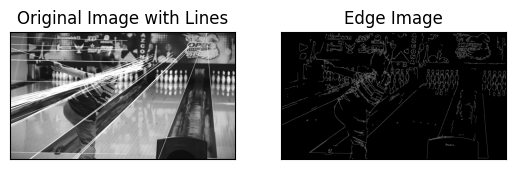

In [32]:
# Use Hough Line Transform to detect lines in the edge-detected image
lines = cv2.HoughLines(edges, 1, np.pi / 180, 180)
lines_image = image.copy()
# Draw the lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(lines_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the original image with detected lines
plt.subplot(121), plt.imshow(lines_image, cmap='gray')
plt.title('Original Image with Lines'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

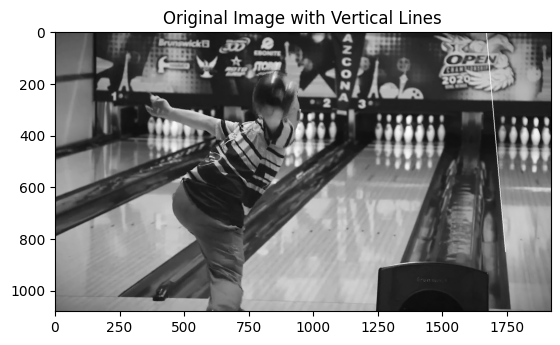

The size of vertical_lines is: 1


In [33]:
# Tolleranza in radianti (20 gradi)
vertical_tolerance = np.deg2rad(20)

if lines is not None:
    # Filtra le linee verticali
    vertical_lines = [line for line in lines if abs(line[0][1]) <= vertical_tolerance or abs(line[0][1] - np.pi) <= vertical_tolerance]
    
    # Crea una copia dell'immagine originale per disegnare le linee
    original_with_vertical_lines = image.copy()

    # Disegna le linee verticali sull'immagine originale
    if vertical_lines is not None:
        for line in vertical_lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(original_with_vertical_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)
    else:
        print('Error')

    # Visualizza l'immagine originale con le linee verticali
    plt.imshow(original_with_vertical_lines, cmap='gray')
    plt.title('Original Image with Vertical Lines')
    plt.show()
    print(f'The size of vertical_lines is: {len(vertical_lines)}')
else:
    print('No lines detected')